<a href="https://colab.research.google.com/github/adhang/learn-tensorflow/blob/main/CNN_Horse_or_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - Horse or Human?

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Libraries

In [1]:
# file handling
import os
import shutil
from shutil import unpack_archive
import glob

# data manipulation
import numpy as np
import pandas as pd

# data viz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# tensorflow
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

# Reading Datasets

## Download Datasets

In [2]:
# download image data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2022-06-21 08:05:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 142.250.125.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   205MB/s    in 0.7s    

2022-06-21 08:05:57 (205 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2022-06-21 08:05:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 142.250.125.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

## Extract Dataset

In [3]:
train_path_zip = '/tmp/horse-or-human.zip'
val_path_zip = '/tmp/validation-horse-or-human.zip'

# extract train dataset
print('Extracting Train Dataset')
unpack_archive(train_path_zip, '/tmp/train')

# extract validation dataset
print('Extracting Validation Dataset')
unpack_archive(val_path_zip, '/tmp/validation')

print('Dataset Extracted')

# remove original zip files
print('Removing Zip Files')
os.remove(train_path_zip)
os.remove(val_path_zip)
print('Zip Files Removed')

Extracting Train Dataset
Extracting Validation Dataset
Dataset Extracted
Removing Zip Files
Zip Files Removed


## Accessing Images

In [4]:
train_dir = '/tmp/train'
val_dir = '/tmp/validation'

train_horse_dir = os.path.join(train_dir, 'horses')
train_human_dir = os.path.join(train_dir, 'humans')

val_horse_dir = os.path.join(val_dir, 'horses')
val_human_dir = os.path.join(val_dir, 'humans')

### File Names

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print('Training images (horses)')
print(train_horse_names[:5])
print()

train_human_names = os.listdir(train_human_dir)
print('Training images (humans)')
print(train_human_names[:5])
print()

val_horse_names = os.listdir(val_horse_dir)
print('Validation images (horses)')
print(val_horse_names[:5])
print()

val_human_names = os.listdir(val_human_dir)
print('Validation images (humans)')
print(val_human_names[:5])
print()

Training images (horses)
['horse18-5.png', 'horse08-6.png', 'horse08-4.png', 'horse32-9.png', 'horse01-1.png']

Training images (humans)
['human01-06.png', 'human10-28.png', 'human07-05.png', 'human16-07.png', 'human07-26.png']

Validation images (horses)
['horse5-565.png', 'horse5-275.png', 'horse3-416.png', 'horse4-588.png', 'horse5-458.png']

Validation images (humans)
['valhuman03-18.png', 'valhuman01-21.png', 'valhuman05-02.png', 'valhuman01-11.png', 'valhuman05-06.png']



### Total Files

In [6]:
print('total train images (horses):', len(os.listdir(train_horse_dir)))
print('total train images (humans):', len(os.listdir(train_human_dir)))
print('total validation images (horses):', len(os.listdir(val_horse_dir)))
print('total validation images (humans):', len(os.listdir(val_human_dir)))

total train images (horses): 500
total train images (humans): 527
total validation images (horses): 128
total validation images (humans): 128


### Visualize

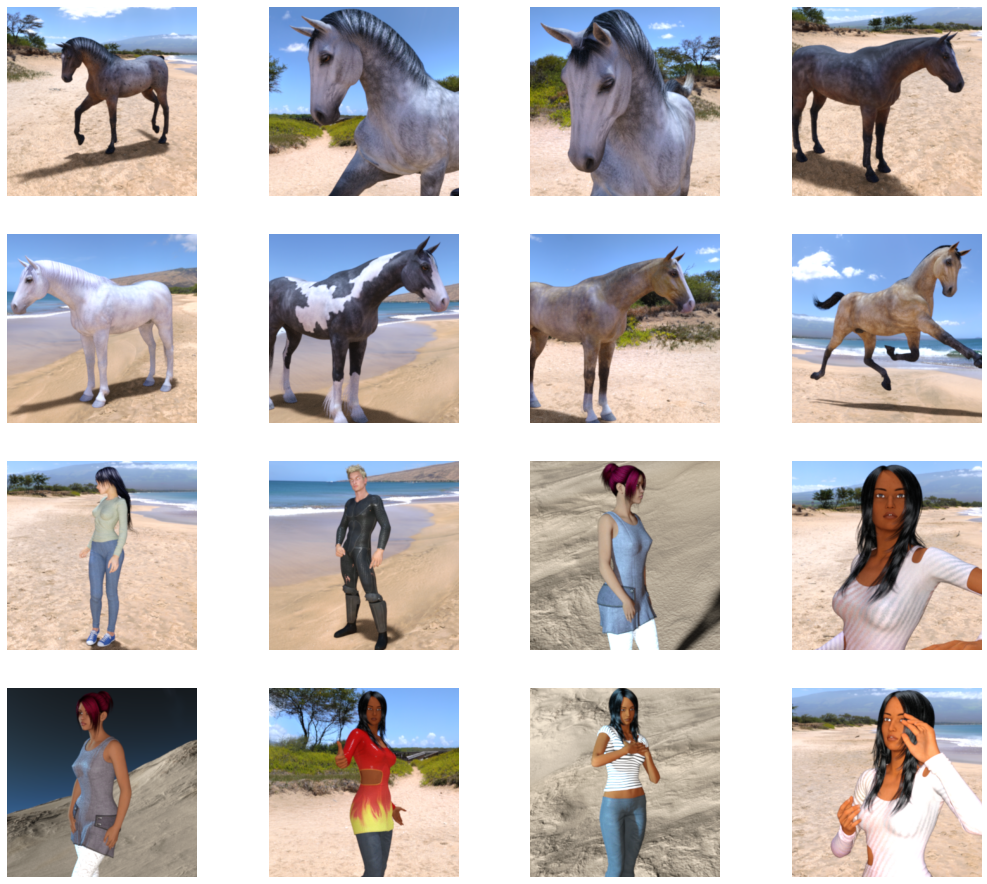

In [7]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Preparation

## Data Augmentation

In [26]:
train_datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range = 30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip = True,
  # shear_range = 0.35,
  fill_mode = 'nearest',
)

# validation data should not be augmented
val_datagen = ImageDataGenerator(
  rescale = 1./255,
)

## Flow Images

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size= 32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Model Development

## Neural Network 

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(256,256,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(256, activation= 'relu'),
  tf.keras.layers.Dense(1, activation= 'sigmoid')
])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       36992     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

## Compile

In [30]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Fit

In [31]:
history = model.fit(train_generator,
                    epochs = 10,
                    batch_size = 32,
                    validation_batch_size = 32,
                    validation_data = val_generator,
                    verbose = 1)

Epoch 1/10
33/33 [==============================] - 22s 614ms/step - loss: 1.0926 - accuracy: 0.6164 - val_loss: 1.2220 - val_accuracy: 0.5469
Epoch 2/10
33/33 [==============================] - 21s 623ms/step - loss: 0.4921 - accuracy: 0.7624 - val_loss: 2.2017 - val_accuracy: 0.5781
Epoch 3/10
33/33 [==============================] - 20s 613ms/step - loss: 0.4105 - accuracy: 0.8101 - val_loss: 3.5840 - val_accuracy: 0.5156
Epoch 4/10
33/33 [==============================] - 20s 617ms/step - loss: 0.3086 - accuracy: 0.8647 - val_loss: 1.7449 - val_accuracy: 0.6289
Epoch 5/10
33/33 [==============================] - 21s 623ms/step - loss: 0.2760 - accuracy: 0.8861 - val_loss: 2.0301 - val_accuracy: 0.5898
Epoch 6/10
33/33 [==============================] - 20s 619ms/step - loss: 0.2327 - accuracy: 0.8939 - val_loss: 2.7020 - val_accuracy: 0.5195
Epoch 7/10
33/33 [==============================] - 21s 621ms/step - loss: 0.3128 - accuracy: 0.8724 - val_loss: 2.5757 - val_accuracy: 0.5938

## Learning Curve

It's clearly overfitting, but I will keep it as it is (at least for now)

### Loss Viz

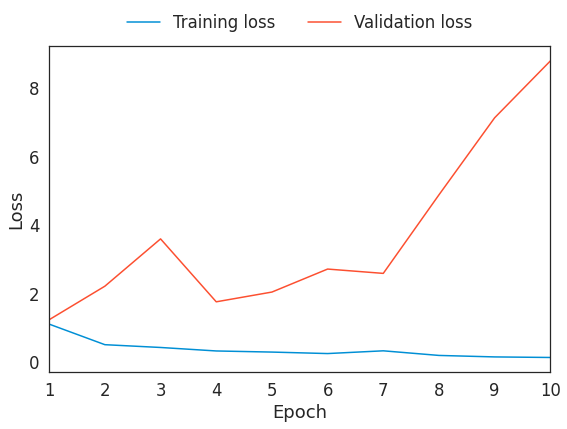

In [32]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'], 
             label='Training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'], 
             label='Validation loss', ax=ax)

ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

plt.show()

### Accuracy Viz

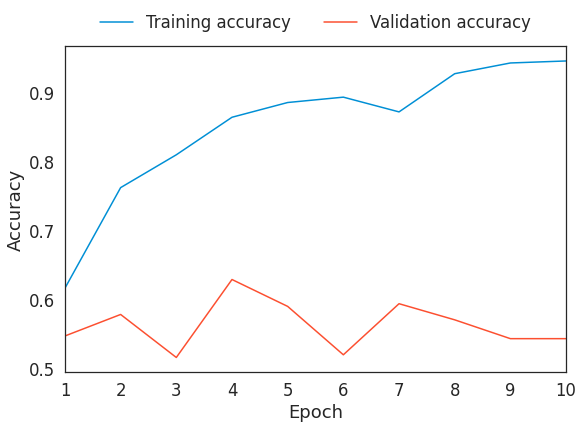

In [33]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['accuracy'])+1)

sns.lineplot(x=epochs, y=history.history['accuracy'], 
             label='Training accuracy', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_accuracy'], 
             label='Validation accuracy', ax=ax)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

plt.show()

## Features Viz

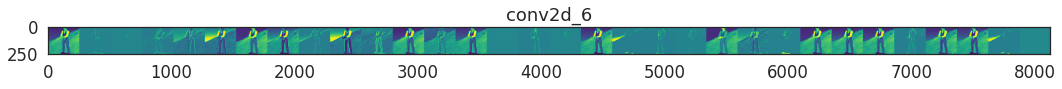

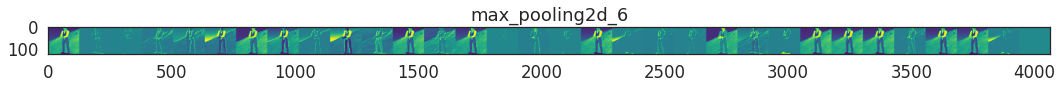

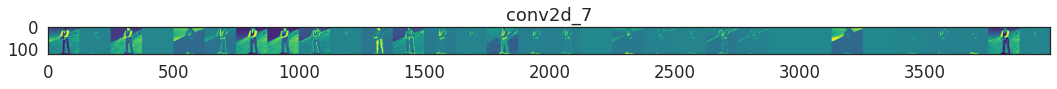

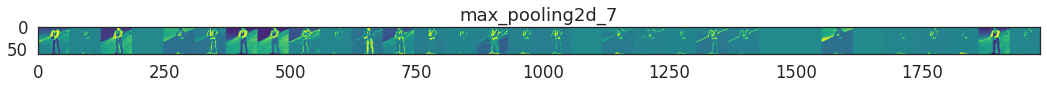

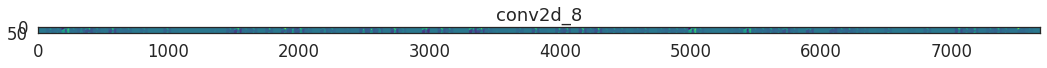

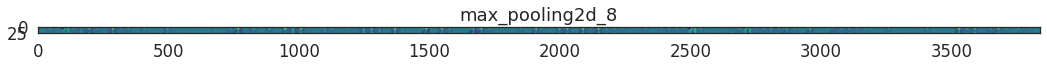

In [34]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(256, 256))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (256, 256, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 256, 256, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.any()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 16. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')